# WEEK 14 (8 January)

### Objectives
* Decide how to determine the clustering levels (log, linear,etc.)
* Produce ODMs at different scaling
* 

In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from hm.pop_models.pop_explicit import explicit as pop_explicit
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from hm.coarse_grain import clustering, coarse_matrix
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### London

In [2]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [42]:
x_lon = np.array(lon_df)[:,5]
y_lon = np.array(lon_df)[:,6]
m_lon = np.array(lon_df)[:,2]
xy_lon = np.array([x_lon, y_lon])
xy_lon = np.transpose(xy_lon)
p_lon = pop_explicit(xy_lon, m_lon)
g_lon = gravity(p_lon, 1, 1, 0.2)

In [86]:
d_max = 5000
lon_clusters = clustering.Clusters(p_lon, d_max)
xy_1 = np.transpose(lon_clusters.centroids())
m_1 = lon_clusters.clustered_pop
lon_1 = pop_explicit(xy_1, m_1)
g_lon1 = gravity(lon_1, 1, 1, 0.2)

d_max = 7000
lon_clusters_2 = clustering.Clusters(lon_1, d_max)
xy_2 = np.transpose(lon_clusters_2.centroids())
m_2 = lon_clusters_2.clustered_pop
lon_2 = pop_explicit(xy_2, m_2)
g_lon2 = gravity(lon_2, 1, 1, 0.2)

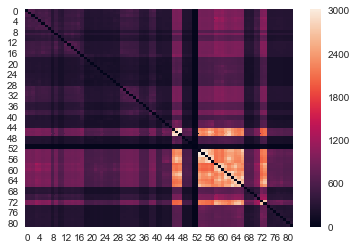

In [94]:
reordered_ODM = coarse_matrix.reorder_matrix(g_lon1.ODM(), lon_clusters_2.clusters)
sns.heatmap(reordered_ODM[0])
plt.show()

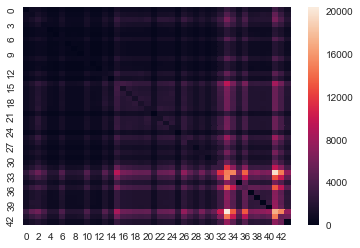

In [95]:
reduced_ODM = coarse_matrix.reduce_matrix(g_lon1.ODM(), lon_clusters_2.clusters)
sns.heatmap(reduced_ODM)
plt.show()